<a href="https://colab.research.google.com/github/curtiscu/LYIT/blob/master/MIDI_Tests_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIDI Tests

Using this colab to test loading MIDI files and examining/ exploring their contents.

## APIs

APIs I'll be testing ..

* MIDO - https://mido.readthedocs.io/en/latest/
* Music21 (MIT) - http://web.mit.edu/music21/doc/

## Data/ Files

Using this data...
* https://magenta.tensorflow.org/datasets/groove#download

Folders with files that look useful...

* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session
* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer5/eval_session
* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer7/eval_session
* /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer8/eval_session



# Env setup

Handy doc on setting up your notebook ...
* https://ipython.readthedocs.io/en/stable/config/options/terminal.html
* https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [0]:
# print all cell output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [0]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# /content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session
! ls -al '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/'

total 35
-rw------- 1 root root 2589 Apr 27 12:01 10_soul-groove10_102_beat_4-4.mid
-rw------- 1 root root 4793 Apr 27 12:01 1_funk-groove1_138_beat_4-4.mid
-rw------- 1 root root 3243 Apr 27 12:01 2_funk-groove2_105_beat_4-4.mid
-rw------- 1 root root 4466 Apr 27 12:01 3_soul-groove3_86_beat_4-4.mid
-rw------- 1 root root 2551 Apr 27 12:01 4_soul-groove4_80_beat_4-4.mid
-rw------- 1 root root 3798 Apr 27 12:01 5_funk-groove5_84_beat_4-4.mid
-rw------- 1 root root 3760 Apr 27 12:01 6_hiphop-groove6_87_beat_4-4.mid
-rw------- 1 root root 1894 Apr 27 12:01 7_pop-groove7_138_beat_4-4.mid
-rw------- 1 root root 2437 Apr 27 12:01 8_rock-groove8_65_beat_4-4.mid
-rw------- 1 root root 3448 Apr 27 12:01 9_soul-groove9_105_beat_4-4.mid


# MIDO

## API setup

In [0]:
!pip install mido


     |████████████████████████████████| 61kB 2.0MB/s 


In [0]:
# install a backend for playing MIDI files etc.
#pip install python-rtmidi

# testing playing files with the following, doesn't work in colab :(

# ! mido-play $file_1


## basic tests

In [0]:
import mido

In [0]:
# testing some basic APIs..

msg = mido.Message('note_on', note=60)
print('Type: {}'.format(msg.type))
print('Note: {}'.format(msg.note))
print('Bytes: {}'.format(msg.bytes()))
print('Copied note info: {}'.format(msg.copy(channel=2)))



Type: note_on
Note: 60
Bytes: [144, 60, 64]
Copied note info: note_on channel=2 note=60 velocity=64 time=0


## file handling

In [0]:
# file handling...

from mido import MidiFile

file_1 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid'
mid = MidiFile(file_1)


There are three types of MIDI files:

* type 0 (single track): all messages are saved in one track
* type 1 (synchronous): all tracks start at the same time
* type 2 (asynchronous): each track is independent of the others

In [0]:
mid.type

0

In [0]:
# total playback time in seconds given by .length property...
mid.length

27.872307693749978

In [0]:
mid.ticks_per_beat

480

In [0]:
print(mid)

<midi file '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/1_funk-groove1_138_beat_4-4.mid' type 0, 1 tracks, 1300 messages>


In [0]:
# examine info for all tracks in a file..
for track in mid.tracks:
    print(track)

<midi track 'MIDI' 1300 messages>


## examine events/ notes

In [0]:
# show data for all tracks..
mid.print_tracks()

=== Track 0
<meta message track_name name='MIDI' time=0>
<meta message instrument_name name='Brooklyn' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message key_signature key='C' time=0>
<meta message smpte_offset frame_rate=24 hours=33 minutes=0 seconds=0 frames=0 sub_frames=0 time=0>
<meta message set_tempo tempo=434783 time=0>
<message note_on channel=9 note=55 velocity=60 time=3>
<message note_on channel=9 note=51 velocity=55 time=4>
<message note_on channel=9 note=36 velocity=64 time=3>
<message control_change channel=9 control=4 value=90 time=3>
<message note_off channel=9 note=55 velocity=64 time=102>
<message note_off channel=9 note=51 velocity=64 time=3>
<message note_off channel=9 note=36 velocity=64 time=2>
<message control_change channel=9 control=4 value=87 time=69>
<message note_on channel=9 note=36 velocity=57 time=22>
<message control_change channel=9 control=4 value=90 time=10>
<message no

## Extract low level data from messages

In [0]:
type(mid.tracks[0])



mido.midifiles.tracks.MidiTrack

In [0]:
for msg in mid.tracks[0]:
    print(msg.dict())

{'type': 'track_name', 'name': 'MIDI', 'time': 0}
{'type': 'instrument_name', 'name': 'Brooklyn', 'time': 0}
{'type': 'time_signature', 'numerator': 4, 'denominator': 4, 'clocks_per_click': 24, 'notated_32nd_notes_per_beat': 8, 'time': 0}
{'type': 'key_signature', 'key': 'C', 'time': 0}
{'type': 'smpte_offset', 'frame_rate': 24, 'hours': 33, 'minutes': 0, 'seconds': 0, 'frames': 0, 'sub_frames': 0, 'time': 0}
{'type': 'set_tempo', 'tempo': 434783, 'time': 0}
{'type': 'note_on', 'time': 3, 'note': 55, 'velocity': 60, 'channel': 9}
{'type': 'note_on', 'time': 4, 'note': 51, 'velocity': 55, 'channel': 9}
{'type': 'note_on', 'time': 3, 'note': 36, 'velocity': 64, 'channel': 9}
{'type': 'control_change', 'time': 3, 'control': 4, 'value': 90, 'channel': 9}
{'type': 'note_off', 'time': 102, 'note': 55, 'velocity': 64, 'channel': 9}
{'type': 'note_off', 'time': 3, 'note': 51, 'velocity': 64, 'channel': 9}
{'type': 'note_off', 'time': 2, 'note': 36, 'velocity': 64, 'channel': 9}
{'type': 'contr

## filter MIDI messages in file..


In [0]:

# filter MIDI messages in file..

# note: the assumption here is we're dealing with a drum/ percussion
# track, therefore only care about 'note_on' events...
for i, track in enumerate(mid.tracks):
    print('Track {}: {}'.format(i, track.name))
    for msg in track:
      if msg.dict()['type'] == 'note_on':
        print(msg)

Track 0: MIDI
note_on channel=9 note=55 velocity=60 time=3
note_on channel=9 note=51 velocity=55 time=4
note_on channel=9 note=36 velocity=64 time=3
note_on channel=9 note=36 velocity=57 time=22
note_on channel=9 note=51 velocity=31 time=17
note_on channel=9 note=44 velocity=77 time=1
note_on channel=9 note=51 velocity=54 time=21
note_on channel=9 note=38 velocity=93 time=8
note_on channel=9 note=44 velocity=52 time=0
note_on channel=9 note=51 velocity=42 time=2
note_on channel=9 note=38 velocity=33 time=12
note_on channel=9 note=44 velocity=77 time=0
note_on channel=9 note=51 velocity=46 time=1
note_on channel=9 note=44 velocity=0 time=27
note_on channel=9 note=51 velocity=0 time=0
note_on channel=9 note=38 velocity=33 time=95
note_on channel=9 note=44 velocity=47 time=0
note_on channel=9 note=36 velocity=59 time=32
note_on channel=9 note=51 velocity=42 time=1
note_on channel=9 note=44 velocity=77 time=1
note_on channel=9 note=51 velocity=64 time=32
note_on channel=9 note=40 velocity=

## tempo conversions

More info here..
* https://mido.readthedocs.io/en/latest/midi_files.html#about-the-time-attribute
* https://majicdesigns.github.io/MD_MIDIFile/page_timing.html

More info on timings..

millisecond is (1/1000) of second

microsecond is 10 power (-6) of second

nano is 10 power(-9)of second.

... this continues as milli,micro,nano,pico,femto, etc.

1000 milliseconds equals second

1,000,000 microseconds equals a second

1 billion nanoseconds equals a second



In [0]:
# # file above being examined should be 138bpm
# tempo given inside file as 434783 microseconds, which is microseconds
# per qaurter note beat. convert that to actual bpm as follows ...
mido.tempo2bpm(434783)

137.99987580011177

In [0]:
# try conversion other way round for comparison...
mido.bpm2tempo(138)

434783

## convert between ticks and seconds
more info..
* https://mido.readthedocs.io/en/latest/midi_files.html#converting-between-ticks-and-seconds


Tempo given in microseconds per beat, default tempo is 500000 microseconds per beat, which is 120 beats per minute. 

Time per tick..
* microseconds per tick = microseconds per quarter note (MIDI tempo from file) / ticks per quarter note (set per file)


In [0]:
# converting between ticks and seconds

# params for the following
#   34 = ticks to convert
#   480 = ticks per beat (from file)
#   434783 = tempo in microseconds per beat
mido.tick2second(34, 480, 434783)

0.030797129166666663

For the example above..

*  0.030797129166666663 seconds = 30.797129166666660893 milliseconds


In [0]:
# TODO: what is this for?
# mido.parse_all(mid)

# Music21

Perhaps useful links..
* https://programtalk.com/python-examples/music21.midi.MidiFile/
* https://web.mit.edu/music21/doc/index.html



## setup, basic tests

In [0]:
!pip install music21

In [0]:
import music21
from music21 import *

In [0]:
# music21.configure.run()

In [0]:
# testing API...
c = chord.Chord("C4 E4 G4")
c.isConsonant()

True

In [0]:
# .. more testing API...
n = note.Note("D#3")
n.duration.type = 'half'
n.show('midi')
n.show('text')

<music21.note.Note D#>


## File handling


In [0]:
# load file, note this is from drummer2...

#m21_file_1 = '/content/drive/My Drive/groove-v1.0.0-midionly/groove/drummer1/eval_session/2_funk-groove2_105_beat_4-4.mid'

# use file from MIDO tests above...
m21_file_1 = file_1

# load file...
midi_file_1 = converter.parse(m21_file_1)




The previous code loads a 'music21.stream.Stream' object ...

* https://web.mit.edu/music21/doc/moduleReference/moduleStream.html

In [0]:
partStream = midi_file_1.parts.stream()
print("List of instruments found on MIDI file:")
for p in partStream:
  print (p.partName)



List of instruments found on MIDI file:
None


In [0]:
timeSignature = midi_file_1.getTimeSignatures()[0]
print("Music time signature: {0}/{1}".format(timeSignature.beatCount, timeSignature.denominator))

Music time signature: 4/4


In [0]:
midi_file_1.duration

<music21.duration.Duration 64.0>

In [0]:
midi_file_1.parts.stream().classes

('Score', 'Stream', 'StreamCoreMixin', 'Music21Object', 'object')

## Show events


### Built in show text

In [0]:
# text display of notes...
midi_file_1.show('text')

{0.0} <music21.stream.Part 0x7f284fbfa1d0>
    {0.0} <music21.tempo.MetronomeMark allegrissimo Quarter=138.0>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0x7f284faa0668>
        {0.0} <music21.chord.Chord G3 E-3 C2>
        {0.5} <music21.chord.Chord C2 E-3>
        {1.0} <music21.chord.Chord G#2 E-3 D2>
        {1.3333} <music21.note.Note G#>
        {1.75} <music21.note.Note D>
        {2.0} <music21.note.Note G#>
        {2.25} <music21.note.Note D>
        {2.5} <music21.chord.Chord C2 E-3>
        {3.0} <music21.note.Note G#>
        {3.3333} <music21.note.Note G#>
        {3.75} <music21.note.Note D>
        {4.0} <music21.note.Note G#>
        {4.3333} <music21.note.Note G#>
        {5.0} <music21.chord.Chord G#2 D2 E-3>
        {5.5} <music21.note.Note G#>
        {5.75} <music21.note.Note D>
        {6.0} <music21.chord.Chord G#2 E-3>
        {6.25} <music21.note.Note D>
        {6.5} <music21.note.Note E->

### show measures

In [0]:
# .. as above, filtered to first 4 bars...
midi_file_1.measures(0, 4).show("text")

{0.0} <music21.stream.Part 0x7f284fb51fd0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.BassClef>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.stream.Voice 0>
            {0.0} <music21.chord.Chord G3 E-3 C2>
            {0.5} <music21.chord.Chord C2 E-3>
            {1.0} <music21.chord.Chord G#2 E-3 D2>
            {1.3333} <music21.note.Note G#>
            {1.75} <music21.note.Note D>
            {2.0} <music21.note.Note G#>
            {2.25} <music21.note.Note D>
            {2.5} <music21.chord.Chord C2 E-3>
            {3.0} <music21.note.Note G#>
            {3.3333} <music21.note.Note G#>
            {3.75} <music21.note.Note D>
        {0.0} <music21.stream.Voice 1>
            {0.0} <music21.note.Rest rest>
            {1.5} <music21.note.Note E->
            {1.5} <music21.note.Rest rest>
            {2.0} <music21.note.Note E->
            {2.3333} <music21.note.Note G#>
            {3.0} <music21.chord.Chord E-3 E2

## Graphical out (piano roll, histo, etc.)

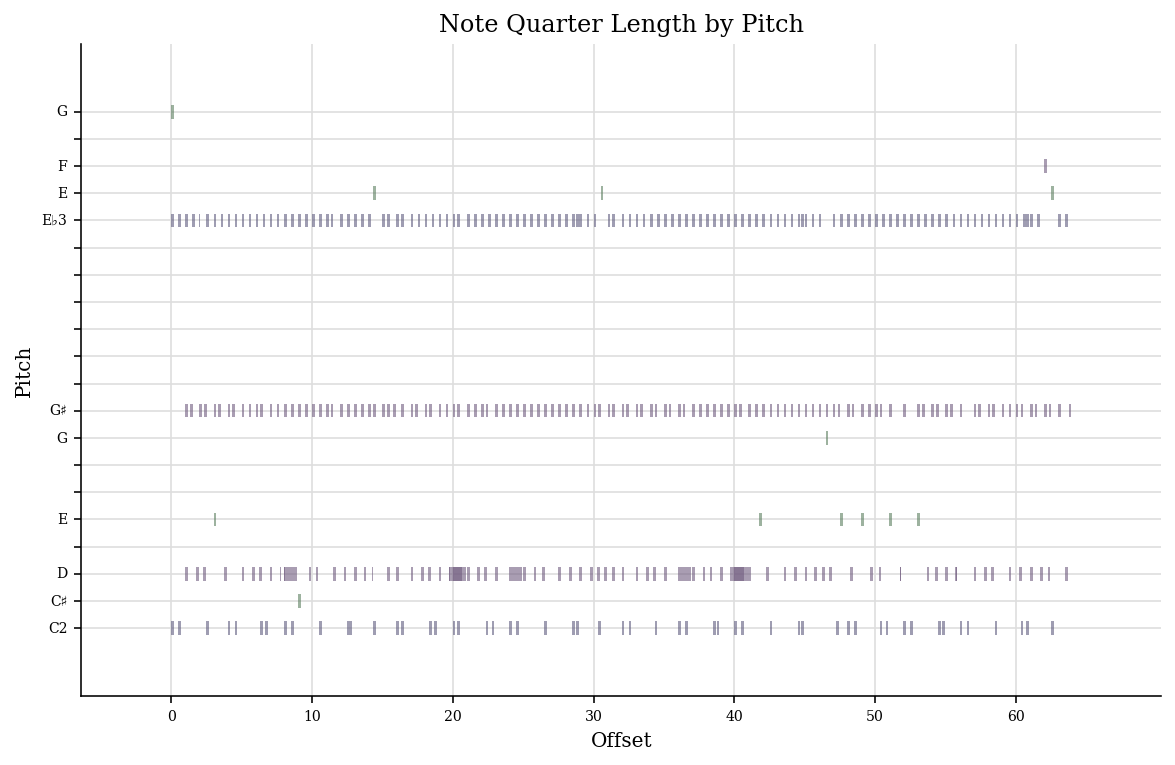

In [0]:
 midi_file_1.plot('pianoroll')

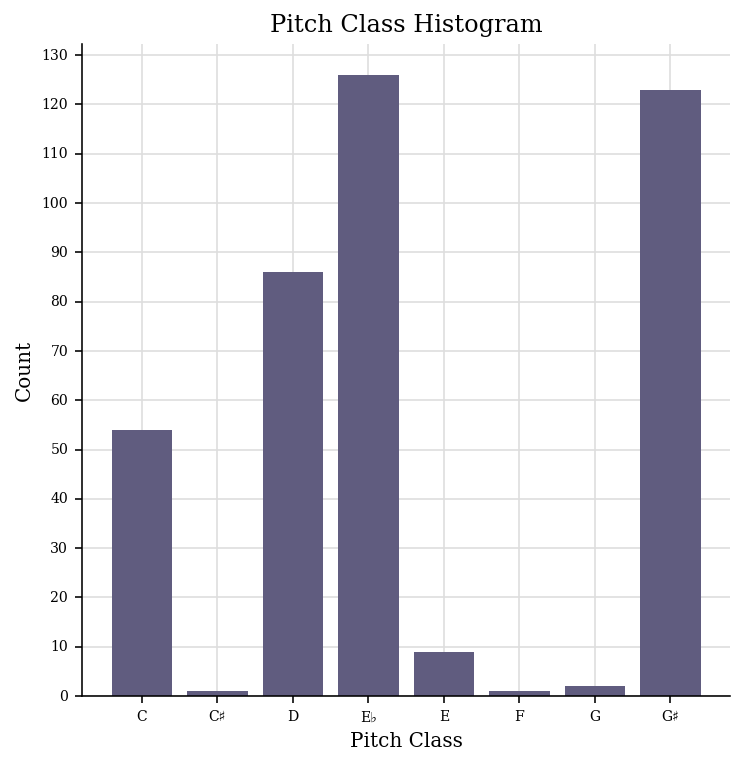

In [0]:
midi_file_1.plot('pitchclass')

### util methods

In [0]:
def pp_note(note):
  return 'key:{}, midi:{}, time:{}, quarterLength:{}'.format(note.pitch, note.pitch.midi, note.duration.fullName, note.duration.quarterLength)


### print stream text

In [0]:
# specify same file as used in MIDO trial above, for comparison, load file...
midi_file_2_stream = converter.parse(file_1)


In [0]:
# text display of notes...
midi_file_2_stream.show('text')

{0.0} <music21.stream.Part 0x7f284c9bcb00>
    {0.0} <music21.tempo.MetronomeMark allegrissimo Quarter=138.0>
    {0.0} <music21.key.Key of C major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.stream.Voice 0x7f284c953a20>
        {0.0} <music21.chord.Chord G3 E-3 C2>
        {0.5} <music21.chord.Chord C2 E-3>
        {1.0} <music21.chord.Chord G#2 E-3 D2>
        {1.3333} <music21.note.Note G#>
        {1.75} <music21.note.Note D>
        {2.0} <music21.note.Note G#>
        {2.25} <music21.note.Note D>
        {2.5} <music21.chord.Chord C2 E-3>
        {3.0} <music21.note.Note G#>
        {3.3333} <music21.note.Note G#>
        {3.75} <music21.note.Note D>
        {4.0} <music21.note.Note G#>
        {4.3333} <music21.note.Note G#>
        {5.0} <music21.chord.Chord G#2 D2 E-3>
        {5.5} <music21.note.Note G#>
        {5.75} <music21.note.Note D>
        {6.0} <music21.chord.Chord G#2 E-3>
        {6.25} <music21.note.Note D>
        {6.5} <music21.note.Note E->

### print stream parts

In [0]:
midi_file_2_stream
print('')
midi_file_2_stream.parts[0].elements

(<music21.tempo.MetronomeMark allegrissimo Quarter=138.0>,
 <music21.key.Key of C major>,
 <music21.meter.TimeSignature 4/4>,
 <music21.stream.Voice 0x7f284c953a20>,
 <music21.stream.Voice 0x7f284c819a90>,
 <music21.stream.Voice 0x7f284c7a3278>,
 <music21.stream.Voice 0x7f284c7b7128>)

### print stream part, elements (i.e. notes)

In [0]:
midi_file_2_stream.parts[0].elements[5]
print('')
midi_file_2_stream.parts[0].elements[5].elements

(<music21.note.Rest rest>,
 <music21.note.Note D>,
 <music21.note.Rest rest>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note E->,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note E->,
 <music21.chord.Chord E-3 C2>,
 <music21.note.Note D>,
 <music21.chord.Chord G#2 C2 E-3>,
 <music21.note.Note G#>,
 <music21.note.Note D>,
 <music21.note.Rest rest>)

### pickout stuff (e.g. rests)

In [0]:
for el in midi_file_2_stream.parts[0].elements[5].getElementsByClass('Rest'):
    print(el, el.offset)

<music21.note.Rest rest> 0.0
<music21.note.Rest rest> 8.0
<music21.note.Rest rest> 599/12


### recursive print

In [0]:
midi_file_2_stream.iter
print('')
next(midi_file_2_stream.iter)


<music21.stream.Part 0x7f284c9bcb00>

In [0]:
# this pulls all the notes out...
myRecIter = midi_file_2_stream.recurse()
myRecIter.notes.elements


(<music21.chord.Chord G3 E-3 C2>,
 <music21.chord.Chord C2 E-3>,
 <music21.chord.Chord G#2 E-3 D2>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note G#>,
 <music21.chord.Chord C2 E-3>,
 <music21.note.Note G#>,
 <music21.chord.Chord E-3 E2>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note G#>,
 <music21.chord.Chord E-3 C2>,
 <music21.note.Note G#>,
 <music21.chord.Chord C2 E-3>,
 <music21.chord.Chord G#2 D2 E-3>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.chord.Chord G#2 E-3>,
 <music21.note.Note D>,
 <music21.chord.Chord C2 G#2>,
 <music21.note.Note E->,
 <music21.note.Note C>,
 <music21.chord.Chord D2 G#2 E-3>,
 <music21.note.Note G#>,
 <music21.note.Note E->,
 <music21.note.Note D>,
 <music21.note.Note D>,
 <music21.chord.Chord G#2 C2 E-3>,
 <music21.note.Note D>,
 <music21.chord.C

### deeper processing/ examining notes

In [0]:

pm = midi.percussion.PercussionMapper()
for note in myRecIter.notes.elements:
  try:
    print('{1} - {0}'.format(pp_note(note), pm.midiPitchToInstrument(note.pitch)))
  except AttributeError:
    # assume we have a chord...
    #print('    chord : {}'.format(note))
    print('    TODO: chord?  {}, time:{}, quarterLength:{}'.format(note, note.duration.fullName, note.duration.quarterLength))
    
    #p_content = ''
    #for p in note.pitches:
    #  p_content + p.nameWithOctave + '; '
    #print(p_content)
    #print('chord: {}'.format(p_content))
      
  except music21.midi.percussion.MIDIPercussionException:
    print('    TODO: remap?  {}'.format(pp_note(note)))

  

    TODO: chord?  <music21.chord.Chord G3 E-3 C2>, time:16th, quarterLength:0.25
    TODO: chord?  <music21.chord.Chord C2 E-3>, time:16th, quarterLength:0.25
    TODO: chord?  <music21.chord.Chord G#2 E-3 D2>, time:16th, quarterLength:0.25
Hi-Hat Cymbal - key:G#2, midi:44, time:16th, quarterLength:0.25
    TODO: remap?  key:E-3, midi:51, time:16th, quarterLength:0.25
Snare Drum - key:D2, midi:38, time:16th, quarterLength:0.25
Hi-Hat Cymbal - key:G#2, midi:44, time:16th, quarterLength:0.25
    TODO: remap?  key:E-3, midi:51, time:Zero, quarterLength:0.0
Snare Drum - key:D2, midi:38, time:16th, quarterLength:0.25
Hi-Hat Cymbal - key:G#2, midi:44, time:16th, quarterLength:0.25
    TODO: chord?  <music21.chord.Chord C2 E-3>, time:16th, quarterLength:0.25
Hi-Hat Cymbal - key:G#2, midi:44, time:16th, quarterLength:0.25
    TODO: chord?  <music21.chord.Chord E-3 E2>, time:16th, quarterLength:0.25
Hi-Hat Cymbal - key:G#2, midi:44, time:16th, quarterLength:0.25
    TODO: remap?  key:E-3, midi:

## music21 API

In [0]:
note

<music21.note.Note G#>

In [0]:
# this will show verbose help inline, or you
# could instead go here: https://web.mit.edu/music21/doc/moduleReference/moduleNote.html#music21.note.Note

# >>> help(note.Note)